In [2]:
import pandas as pd

# Path to your .pickle file
file_path = '/Users/Trymso/Desktop/events_rbk_viking_10-04-2023.pickle'

data = pd.read_pickle(file_path)
data.head()

,match_id,iteration_id,home_squad_id,away_squad_id,event_id,event_number,period_id,game_time,game_time_in_sec,duration,...,shot_gk_adj_coordinates_x,shot_gk_adj_coordinates_y,duel_type,duel_player_id,fouled_player_id,formation_team,formation_opponent,bypassed__opponents,xg,postshot__xg
0,106672,649,775,1673,3383855592,0,1,00:00.0000,0.0000,1.7530,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,<NA>,NaN,NaN
1,106672,649,775,1673,3383855593,1,1,00:01.7530,1.7530,0.0001,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,<NA>,NaN,NaN
2,106672,649,775,1673,3383855594,2,1,00:01.7531,1.7531,1.1339,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,1,NaN,NaN
3,106672,649,775,1673,3383855595,3,1,00:02.8870,2.8870,0.0001,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,<NA>,NaN,NaN
4,106672,649,775,1673,3383855596,4,1,00:02.8871,2.8871,0.6849,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,<NA>,NaN,NaN


In [6]:
df = data

In [14]:
# Filter for goals and shots separately
df_goals = df[df['action_type'] == 'GOAL']
df_shots = df[df['action_type'] == 'SHOT']

In [22]:
df.action_type.unique()

array(['KICK_OFF', 'RECEPTION', 'PASS', 'DRIBBLE', 'BLOCK', 'OUT',
       'CORNER', 'SHOT', 'LOOSE_BALL_REGAIN', 'INTERCEPTION', 'GK_SAVE',
       'FOUL', 'FREE_KICK', 'GROUND_DUEL', 'GK_CATCH', 'NO_VIDEO',
       'CLEARANCE', 'THROW_IN', 'REFEREE_INTERCEPTION', 'GOAL_KICK',
       'OFFSIDE', 'FINAL_WHISTLE', 'GOAL', 'RED_CARD'], dtype=object)

TypeError: boolean value of NA is ambiguous

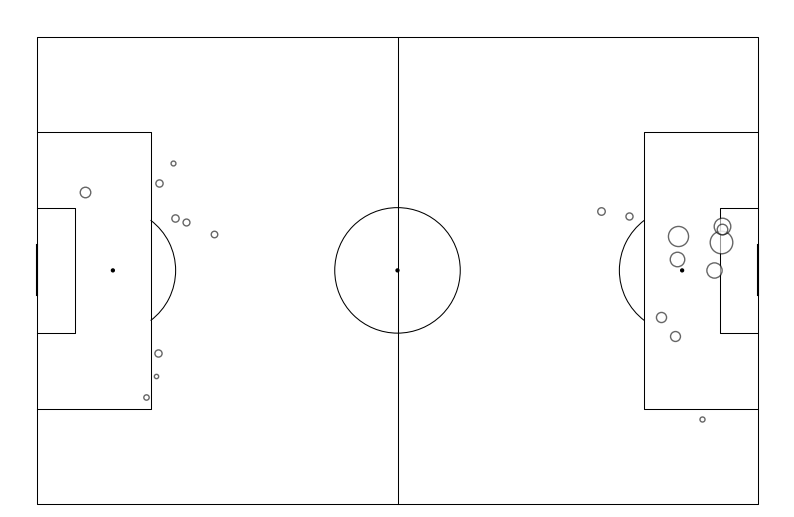

In [24]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Filter for shots and goals separately
df_shots_filtered = df_shots[df_shots['action_type'] == 'SHOT']
df_goals_filtered = df_goals[df_goals['action_type'] == 'GOAL']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the pitch with origin centered and matching your diagram dimensions
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, 
              pitch_color='white', line_color='black', pad_bottom=0.5, linewidth=0.75)
pitch.draw(ax=ax)  # Pass the axis to the `draw` method

# Plotting shots first (including non-goal shots)
for x in df_shots_filtered.to_dict(orient='records'):
    if x['attacking_squad_id'] == 775:  # Home team
        # Adjust the x and y coordinates for the home team
        adjusted_x = 52.5 - x['start_adj_x']
        adjusted_y = 34 - x['start_adj_y']

        # Plot non-goal shots for the home team
        pitch.scatter(x=adjusted_x, y=adjusted_y, ax=ax, s=800 * x['xg'], 
                      edgecolor='black', color='#FFFFFF', zorder=2, alpha=0.6)

    elif x['attacking_squad_id'] == 1673:  # Away team
        # Adjust the x and y coordinates for the away team (mirror x-axis)
        adjusted_x = 52.5 + x['start_adj_x']  # Inverted x-axis for away team
        adjusted_y = 34 + x['start_adj_y']

        # Plot non-goal shots for the away team
        pitch.scatter(x=adjusted_x, y=adjusted_y, ax=ax, s=800 * x['xg'], 
                      edgecolor='black', color='#FFFFFF', zorder=2, alpha=0.6)

# Plotting goals separately
for x in df_goals_filtered.to_dict(orient='records'):
    if x['attacking_squad_id'] == 775:  # Home team
        # Adjust the x and y coordinates for the home team
        adjusted_x = 52.5 - x['start_adj_x']
        adjusted_y = 34 - x['start_adj_y']

        # Plot goal events for the home team
        pitch.scatter(x=adjusted_x, y=adjusted_y, ax=ax, s=800 * x['xg'], 
                      edgecolor='black', color='red', marker='*', zorder=3)

    elif x['attacking_squad_id'] == 1673:  # Away team
        # Adjust the x and y coordinates for the away team (mirror x-axis)
        adjusted_x = 52.5 + x['start_adj_x']  # Inverted x-axis for away team
        adjusted_y = 34 + x['start_adj_y']

        # Plot goal events for the away team
        pitch.scatter(x=adjusted_x, y=adjusted_y, ax=ax, s=800 * x['xg'], 
                      edgecolor='black', color='blue', marker='*', zorder=3)

plt.show()


In [30]:
df_goals.columns

Index(['match_id', 'iteration_id', 'home_squad_id', 'away_squad_id',
       'event_id', 'event_number', 'period_id', 'game_time',
       'game_time_in_sec', 'duration', 'squad_id', 'attacking_squad_id',
       'player_id', 'player_position', 'action_type', 'body_part',
       'body_part_extended', 'previous_pass_height', 'result', 'start_x',
       'start_y', 'start_adj_x', 'start_adj_y', 'start_pitch_position',
       'start_lane', 'end_x', 'end_y', 'end_adj_x', 'end_adj_y',
       'end_pitch_position', 'end_lane', 'distance_to_goal',
       'pressing_player_id', 'opponent_coordinates_x',
       'opponent_coordinates_y', 'opponent_adj_coordinates_x',
       'opponent_adj_coordinates_y', 'pass_receiver_type',
       'pass_receiver_player_id', 'pass_distance', 'pass_angle',
       'shot_distance', 'shot_angle', 'shot_target_point_y',
       'shot_target_point_z', 'shot_woodwork', 'shot_gk_coordinates_x',
       'shot_gk_coordinates_y', 'shot_gk_adj_coordinates_x',
       'shot_gk_adj_co

In [68]:
print(df_shots[['xg', 'distance_to_goal']].head())  # Replace with actual column names


          xg  distance_to_goal
18   0.03462              21.5
43   0.01517              25.2
392  0.06627              15.6
426  0.13650              11.9
482  0.33082               6.7


In [44]:
df_passes = df[df['action_type'] == 'PASS']
print(df_passes[['start_adj_x', 'start_adj_y']].head())

    start_adj_x  start_adj_y
2          -8.2         -0.1
4           1.5          0.1
6          -2.7          6.5
9          35.2        -26.5
15         44.1        -26.7


In [70]:
df.columns

Index(['match_id', 'iteration_id', 'home_squad_id', 'away_squad_id',
       'event_id', 'event_number', 'period_id', 'game_time',
       'game_time_in_sec', 'duration', 'squad_id', 'attacking_squad_id',
       'player_id', 'player_position', 'action_type', 'body_part',
       'body_part_extended', 'previous_pass_height', 'result', 'start_x',
       'start_y', 'start_adj_x', 'start_adj_y', 'start_pitch_position',
       'start_lane', 'end_x', 'end_y', 'end_adj_x', 'end_adj_y',
       'end_pitch_position', 'end_lane', 'distance_to_goal',
       'pressing_player_id', 'opponent_coordinates_x',
       'opponent_coordinates_y', 'opponent_adj_coordinates_x',
       'opponent_adj_coordinates_y', 'pass_receiver_type',
       'pass_receiver_player_id', 'pass_distance', 'pass_angle',
       'shot_distance', 'shot_angle', 'shot_target_point_y',
       'shot_target_point_z', 'shot_woodwork', 'shot_gk_coordinates_x',
       'shot_gk_coordinates_y', 'shot_gk_adj_coordinates_x',
       'shot_gk_adj_co

In [72]:
df.bypassed__opponents.unique()

<IntegerArray>
[<NA>, 1]
Length: 2, dtype: Int64

In [76]:
df_bypassed = df[(df['action_type'] == 'PASS') & (df['bypassed__opponents'] == 1)].dropna(subset=['bypassed__opponents'])


In [78]:
df_bypassed

,match_id,iteration_id,home_squad_id,away_squad_id,event_id,event_number,period_id,game_time,game_time_in_sec,duration,...,shot_gk_adj_coordinates_x,shot_gk_adj_coordinates_y,duel_type,duel_player_id,fouled_player_id,formation_team,formation_opponent,bypassed__opponents,xg,postshot__xg
2,106672,649,775,1673,3383855594,2,1,00:01.7531,1.7531,1.1339,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,1,NaN,NaN
6,106672,649,775,1673,3383855598,6,1,00:03.5721,3.5721,2.5459,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,1,NaN,NaN
25,106672,649,775,1673,3383855617,25,1,01:05.0331,65.0331,1.2259,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,1,NaN,NaN
34,106672,649,775,1673,3383855626,34,1,01:13.0361,73.0361,0.8879,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,4-3-3,1,NaN,NaN
56,106672,649,775,1673,3383855648,56,1,02:03.9131,123.9131,2.0049,...,NaN,NaN,NaN,<NA>,<NA>,4-3-3,5-3-2,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,106672,649,775,1673,3383883180,2588,2,90:00.0000 (+03:30.2591),12910.2591,1.7279,...,NaN,NaN,NaN,<NA>,<NA>,5-3-2,UNKNOWN,1,NaN,NaN
2592,106672,649,775,1673,3383883184,2592,2,90:00.0000 (+03:32.9511),12912.9511,1.6989,...,NaN,NaN,NaN,<NA>,<NA>,UNKNOWN,5-3-2,1,NaN,NaN
2612,106672,649,775,1673,3383883204,2612,2,90:00.0000 (+03:57.3920),12937.3920,3.3210,...,NaN,NaN,NaN,<NA>,<NA>,UNKNOWN,5-3-2,1,NaN,NaN
2614,106672,649,775,1673,3383883206,2614,2,90:00.0000 (+04:00.7131),12940.7131,2.1099,...,NaN,NaN,NaN,<NA>,<NA>,UNKNOWN,5-3-2,1,NaN,NaN


In [82]:
# Filter the passes and drop NA values
df_bypassed = df[(df['action_type'] == 'PASS') & (df['bypassed__opponents'] == 1)].dropna(subset=['bypassed__opponents'])

# Group by player_id, player_position, and squad_id, then count the passes
pass_counts = df_bypassed.groupby(['player_id', 'player_position', 'squad_id']).size().reset_index(name='pass_count')

# Sort by pass_count in descending order to get the ranking
pass_counts_sorted = pass_counts.sort_values(by='pass_count', ascending=False)

pass_counts_sorted.head(10)


,player_id,player_position,squad_id,pass_count
29,119978,CENTRAL_DEFENDER,1673,18
24,66807,RIGHT_WINGBACK_DEFENDER,1673,18
18,41957,CENTRAL_DEFENDER,775,18
4,4260,CENTRAL_DEFENDER,1673,17
25,75696,LEFT_WINGBACK_DEFENDER,1673,13
6,10389,LEFT_WINGER,1673,12
7,12999,CENTRAL_DEFENDER,775,11
9,20739,GOALKEEPER,775,11
10,29228,CENTRAL_DEFENDER,775,11
17,32299,DEFENSE_MIDFIELD,1673,10


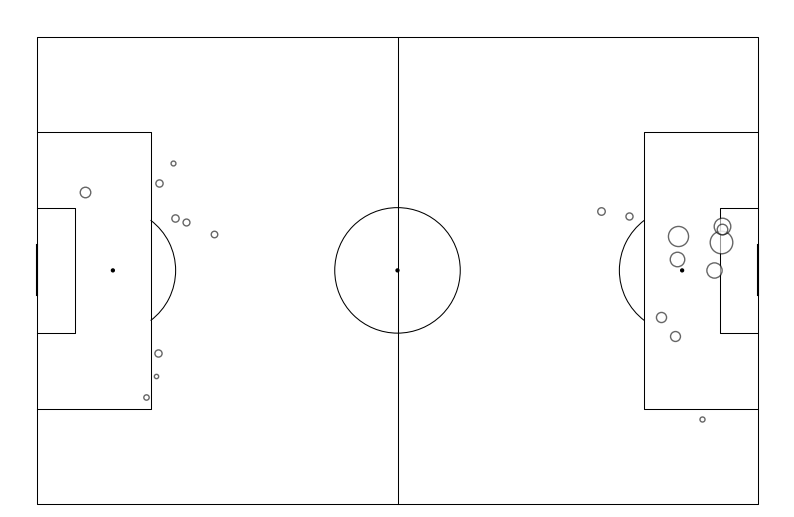

In [85]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the pitch with origin centered and matching your diagram dimensions
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, 
              pitch_color='white', line_color='black', pad_bottom=0.5, linewidth=0.75)
pitch.draw(ax=ax)  # Pass the axis to the `draw` method

# Plotting shots (excluding goals)
for x in df_shots.to_dict(orient='records'):
    if x['attacking_squad_id'] == 775:  # Home team
        # Adjust the x and y coordinates for the home team
        adjusted_x = 52.5 - x['start_adj_x']
        adjusted_y = 34 - x['start_adj_y']

        # Plot non-goal shots for the home team
        if x['action_type'] == 'SHOT':  # Ensure we only plot shots
            pitch.scatter(x=adjusted_x, y=adjusted_y, ax=ax, s=800 * x['xg'], 
                          edgecolor='black', color='#FFFFFF', zorder=2, alpha=0.6)

    elif x['attacking_squad_id'] == 1673:  # Away team
        # Adjust the x and y coordinates for the away team (mirror x-axis)
        adjusted_x = 52.5 + x['start_adj_x']  # Inverted x-axis for away team
        adjusted_y = 34 + x['start_adj_y']

        # Plot non-goal shots for the away team
        if x['action_type'] == 'SHOT':  # Ensure we only plot shots
            pitch.scatter(x=adjusted_x, y=adjusted_y, ax=ax, s=800 * x['xg'], 
                          edgecolor='black', color='#FFFFFF', zorder=2, alpha=0.6)

plt.show()
